## <center>图片几何变换</center>


## 1.cv2.resize函数
`resize(InputArray src, OutputArray dst, Size dsize, double fx=0, double fy=0, int interpolation=INTER_LINEAR )`

- `InputArray src`:输入，原图像，即待改变大小的图像；
- `OutputArray dst`:输出，改变后的图像。这个图像和原图像具有相同的内容，只是大小和原图像不一样而已；
- `dsize`:输出图像的大小。
  - 如果这个参数不为0，那么就代表将原图像缩放到这个Size(width，height)指定的大小；如果这个参数为0，那么原图像缩放之后的大小就要通过下 面的公式来计算：dsize = Size(round(fxsrc.cols), round(fysrc.rows))
- `fx`：width方向的缩放比例，如果它是0，那么它就会按照(double)dsize.width/src.cols来计算。
- `fy`：height方向的缩放比例，如果它是0，那么它就会按照(double)dsize.height/src.rows来计算。

- `interpolation`:这个是指定插值的方式，图像缩放之后，肯定像素要进行重新计算的，就靠这个参数来指定重新计算像素的方式
  - `INTER_NEAREST` - 最邻近插值
  - `INTER_LINEAR` - 双线性插值，如果最后一个参数你不指定，默认使用这种方法
  - `INTER_AREA` - 使用像素面积关系重新取样。这可能是图像抽取的首选方法，因为它可以得到无摩尔纹的结果。但当图像被放大时，它与INTER_NEAREST方法类似。
  - `INTER_CUBIC` - 4x4像素邻域内的双立方插值
  - `INTER_LANCZOS4` - 8x8像素邻域内的Lanczos插值

**ATTENTION**
- `dsize和fx/fy不能同时为0` 要么你就指定好dsize的值，让fx和fy空置直接使用默认值，就像resize(img, imgDst, Size(30,30));要么你就让dsize为0，指定好fx和fy的值，比如fx=fy=0.5，那么就相当于把原图两个方向缩小一倍！
- 至于最后的插值方法，正常情况下使用默认的双线性插值就够用了。
- 几种常用方法的效率是：最邻近插值>双线性插值>双立方插值>Lanczos插值；但是效率和效果成反比，所以根据自己的情况酌情使用。
- 正常情况下，在使用之前dst图像的大小和类型都是不知道的，类型从src图像继承而来，大小也是从原图像根据参数计算出来。但是如果你事先已经指定好dst图像的大小，那么你可以通过下面这种方式来调用函数：
resize(src, dst, dst.size(), 0, 0, interpolation);



**`缩放`**

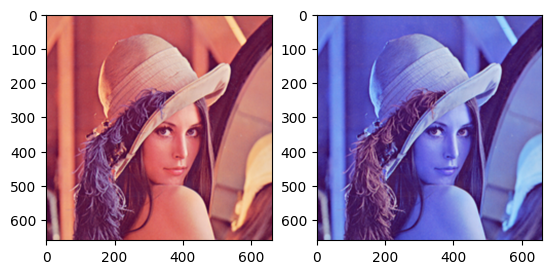

In [12]:
import cv2 as cv
import numpy
import matplotlib.pyplot as plt

img = cv.imread('../Lenna.png')
res = cv.resize(img, None, fx=3, fy=3, interpolation=cv.INTER_CUBIC)

rgb_res = cv.cvtColor(res, cv.COLOR_BGR2RGB)

plt.subplot(121)
# plt.xticks([]), plt.yticks([])
plt.imshow(rgb_res)
plt.subplot(122)
# plt.xticks([]), plt.yticks([])
plt.imshow(res)


##  2.cv2.warpAffine函数
`cv.warpAffine(img,M,(cols,rows))`

Args:
- `img`:需要转换的图片
- `M`:      转换矩阵
- `(cols, rows)`:输出图像大小

**`平移`**

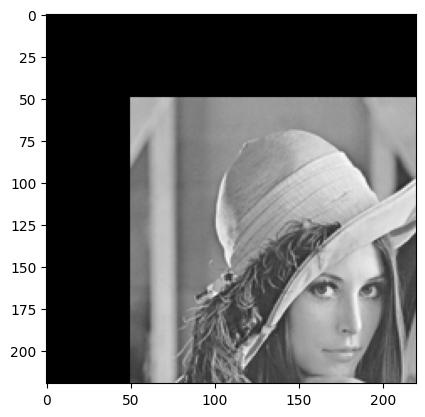

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('../Lenna.png', 0)

rows, cols = img.shape
M = np.array([[1, 0, 50], [0, 1, 50]], dtype=np.float32)
dst = cv.warpAffine(img, M, (cols, rows))

plt.imshow(dst, cmap='gray')



##  3.cv2.getRotationMatrix2D函数
OpenCV提供了可缩放的旋转以及可调整的旋转中心，因此您可以在自己喜欢的任何位置旋转。


**`旋转`**

(2, 3)
[[ 6.12323400e-17  1.00000000e+00 -1.42108547e-14]
 [-1.00000000e+00  6.12323400e-17  2.19000000e+02]]


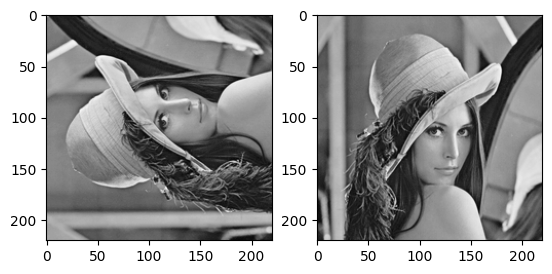

In [10]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('../Lenna.png', 0)

rows, cols = img.shape

M = cv.getRotationMatrix2D(((cols-1)/2.0, (rows-1)/2.0), 90, 1)
print(M.shape)
print(M)
dst = cv.warpAffine(img, M, (cols, rows))

plt.subplot(121)
plt.imshow(dst, cmap='gray')
plt.subplot(122)
plt.imshow(img, cmap='gray')


## 4.cv2.getAffineTransform函数

在仿射变换中，原始图像中的所有平行线在输出图像中仍将平行。为了找到变换矩阵，我们需要输入图像中的三个点及其在输出图像中的对应位置。然后**cv.getAffineTransform**将创建一个2x3矩阵，该矩阵将传递给**cv.warpAffine**。


**`仿射变换`**


[[  0.6         -3.         130.        ]
 [ -0.33333333   0.         116.66666667]]


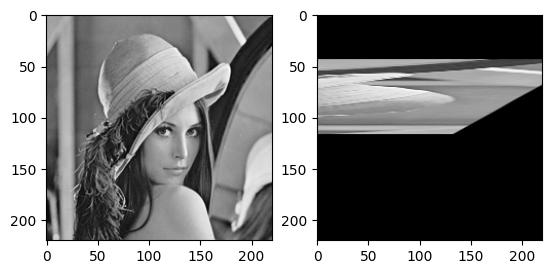

In [20]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('../Lenna.png', 0)
cols, rows = img.shape

pst1 = np.array([[50, 50], [200, 50], [50, 20]], dtype=np.float32)
pst2 = np.array([[10, 100], [100, 50], [100, 100]], dtype=np.float32)

M = cv.getAffineTransform(pst1, pst2)
print(M)
dst = cv.warpAffine(img, M, (cols, rows))

plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.subplot(122)
plt.imshow(dst, cmap='gray')


## 5.透视变换

对于透视变换，您需要3x3变换矩阵。即使在转换后，直线也将保持直线。要找到此变换矩阵，您需要在输入图像上有4个点，在输出图像上需要相应的点。在这四个点中，其中三个不应共线。然后可以通过函数**cv.getPerspectiveTransform**找到变换矩阵。然后将**cv.warpPerspective**应用于此3x3转换矩阵。

**`透视变换`**

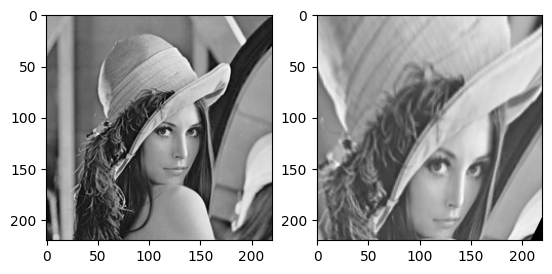

In [22]:
import cv2 as cv
import matplotlib.pyplot as plt 
import numpy as np

img = cv.imread('../Lenna.png', 0)
rows, cols= img.shape

pts1 = np.array([[56, 65], [150, 52], [28, 150], [200, 150]], dtype=np.float32)
pts2 = np.array([[0,0],[200,0],[0,200],[200,200]], dtype=np.float32)

M = cv.getPerspectiveTransform(pts1, pts2)
dst = cv.warpPerspective(img, M, (rows, cols))

plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.subplot(122)
plt.imshow(dst, cmap='gray')


